 ## Варіант 5
 ### Завдання  1
Користуючись інтерполяційною схемою Ейткена, обчислити з заданою точністю
значення даної функції в заданій точці $x_0$
 $$\sqrt{5x^3-4x+2}; \epsilon=0.002$$
 
 Нехай ми будемо шукати значення функції в точці $x=-0.5$

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from IPython.display import display, Markdown, Math
from matplotlib.pyplot import figure

,$x_i$,$y_i$,$P_{i+1}(x)$,$P_{i+2}(x)$,$P_{i+3}(x)$,$P_{i+4}(x)$,$P_{i+5}(x)$,$P_{i+6}(x)$
0,-1.0,1.000000,2.260695,1.870830,1.847151,1.842296,1.838744,1.837688
1,-0.7,1.756417,1.792857,1.828208,1.835498,1.831640,1.834944,NaN
2,-0.4,1.811077,1.898910,1.861015,1.812348,1.856421,NaN,NaN
3,-0.1,1.547579,2.126280,2.299013,1.283473,NaN,NaN,NaN
4,0.2,1.113553,1.867181,4.583976,NaN,NaN,NaN,NaN
5,0.5,0.790569,-0.461500,NaN,NaN,NaN,NaN,NaN
6,0.8,1.166190,NaN,NaN,NaN,NaN,NaN,NaN


$|P_{0, 1}(x) - P_{0, 1, 2}(x)| = 0.38986477023476485$

$|P_{0, 1, 2}(x) - P_{0, 1, 2, 3}(x)| = 0.02367889458313921$

$|P_{0, 1, 2, 3}(x) - P_{0, 1, 2, 3, 4}(x)| = 0.004855292304240422$

$|P_{0, 1, 2, 3, 4}(x) - P_{0, 1, 2, 3, 4, 5}(x)| = 0.0035519128411958256$

$|P_{0, 1, 2, 3, 4, 5}(x) - P_{0, 1, 2, 3, 4, 5, 6}(x)| = 0.0010554600833028172$

$0.0010554600833028172 < 0.002\ \ f(-0.5) =  1.8377$

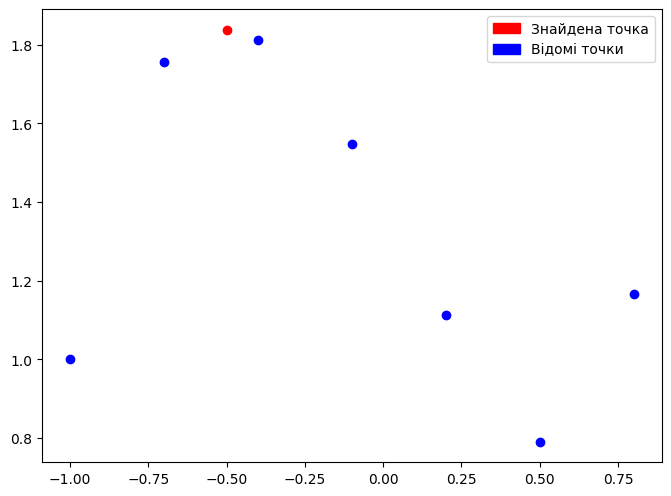

In [235]:
figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')

f = lambda x: np.sqrt(5*x**3-4*x+2)
# шукане значення
x = -0.5
# починаючи з точки -1 з кроком 0.3 йдем до 1
x_i = np.arange(-1, 1, 0.3)
# рахуємо значення в точках x_i
y_i = f(x_i)
# точність
epsilon = 0.002

def aitken_table(x, x_i, y_i):
    P = [np.copy(y_i)]
    for i in range(1, len(x_i)):
        # vector operations, Det unwrapped
        P.append(
            ((-x_i[:-i]+x)*(P[i-1][1:])-(-x_i[i:]+x)*(P[i-1][:-1]))/(x_i[i:]-x_i[:-i])
        )
    return P

# створюємо нову таблицю
table = aitken_table(x, x_i, y_i)
# перетворюємо її в pandas з приєднанням іксів
df_table = pd.concat([
    pd.DataFrame(x_i),
    pd.DataFrame(table).transpose(),
], axis=1)
df_table.columns = [
    '$x_i$',
    '$y_i$', 
    *('$P_{i+'+str(i)+'}(x)$' for i in range(1, len(table)))
]
display(df_table)

# Рахуємо різниці
deltas = []
for i in range(1, len(table)-1):
    deltas.append(np.abs(table[i+1][0]-table[i][0]))
    display(Markdown(
        '$|P_{'+str(tuple(range(i+1)))[1:-1]+\
        '}(x) - P_{'+\
        str(tuple(range(i+2)))[1:-1]+\
        '}(x)| = '+\
        str(deltas[-1])+'$'
    ))
    if deltas[-1] < epsilon:
        display(Markdown(
            f"${deltas[-1]} < {epsilon}"
            r"\ \ f("
            f"{x}) = "
            f" {round(table[i+1][0], 4)}$"
        ))
        break

points = plt.plot(x_i, y_i, 'bo')
aitken_point = plt.plot(x, table[-1][-1], 'ro')
blue_patch = mpatches.Patch(color='blue', label='Відомі точки')
red_patch = mpatches.Patch(color='red', label='Знайдена точка')
plt.legend(handles=[red_patch, blue_patch])
plt.show()

### Завдання  2
Користуючись інтерполяційною формулою Лагранжа або Ньютона, знайти
значення функції для заданого аргумента. Оцінити похибку отриманого результату. Зобразити
графіки Заданої функції та інтерполянти.

In [243]:
from scipy.interpolate import lagrange
from scipy.special import factorial
from scipy.misc import derivative
from functools import reduce

In [244]:
f = lambda x: np.sqrt(5*x**3-4*x+2)
start = -1
stop = 2
step = 0.6
x_i = np.arange(start, stop, step)
# рахуємо значення в точках x_i
y_i = f(x_i)

In [245]:
xy_table = pd.concat([
    pd.DataFrame(x_i),
    pd.DataFrame(y_i),
], axis=1)
xy_table.columns = ['$x_i$', '$y_i$',]
xy_table = xy_table.transpose()
display(xy_table)

,0,1,2,3,4
$x_i$,-1.0,-0.400000,0.200000,0.80000,1.400000
$y_i$,1.0,1.811077,1.113553,1.16619,3.181195


In [280]:
def show_plot(x_i, y_i, f, polynom, title):
    figure(num=None, figsize=(8, 6), dpi=100, facecolor='w', edgecolor='k')
    xmin, xmax = x_i.min(), x_i.max()
    x_linspace = np.linspace(xmin, xmax, 100)
    points = plt.plot(x_i, y_i, 'go')
    f_plt = plt.plot(x_linspace, f(x_linspace), 'r-')
    L_plt = plt.plot(x_linspace, polynom(x_linspace), 'b')
    blue_patch = mpatches.Patch(color='blue', label='Графік інтерполянта')
    red_patch = mpatches.Patch(color='red', label='Графік функції')
    green_patch = mpatches.Patch(color='green', label='Значення в вузлах інтерполяції')
    plt.legend(handles=[red_patch, blue_patch, green_patch])
    plt.title(title)
    plt.show()

Інтерполяційний многочлен Лагранжа має вигляд $-0.3364704368803928x^4+1.6082843901810964x^3+0.27880282449809957x^2-1.3132326378331263x^1+1.3527193647302655$

$$|R_5x| \le \frac{M_5}{5!}|\omega(x)| =\frac{974630.1543600564}{120.0}0.08644999999999996 = 702.1398070368903$$

Точність інтерполювання в точці $x=-0.5$ складає $\pm702.1398070368903$

_(нотатка: всю оцінку точності "псує" модуль занчення п'ятої похідної в точці $-1$ )_

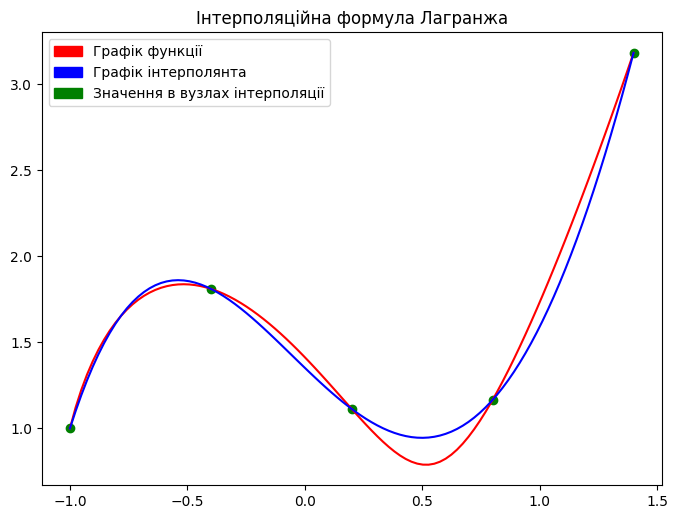

In [240]:
x = -0.5
L_n = lagrange(x_i, y_i)
# для відображення поліному Лагранжа
polynom_coef = list(zip(list(range(len(L_n.coefficients)-1,-1,-1)), L_n.coefficients))
latex_polynom = reduce(
    lambda prev, p_c: prev+str(p_c[1])+'x^'+str(p_c[0]) if p_c[1] < 0 else prev+'+'+str(p_c[1])+'x^'+str(p_c[0]), ['']+polynom_coef
)
latex_polynom = "$" + latex_polynom[:-3] + "$"
display(Markdown("Інтерполяційний многочлен Лагранжа має вигляд "+latex_polynom))
# точність
M_max  = np.abs(derivative(f, np.linspace(x_i.min(), x_i.max(), 100), n=len(x_i), dx=0.0005, order=len(x_i)+1+(len(x_i))%2)).max()
L_err = (M_max*np.abs(np.prod(-x_i+x)))/factorial(len(x_i))
display(Markdown(r"$$|R_"+str(len(x_i))+r"x| \le \frac{M_"+str(len(x_i))+"}{"+str(len(x_i))+r"!}|\omega(x)| ="
                 r"\frac{"+str(M_max)+"}{"+str(factorial(len(x_i)))+r"}"+str(np.prod(-x_i+x))+f" = {L_err}$$"))
display(Markdown(f"Точність інтерполювання в точці $x={x}$ складає $\\pm{L_err}$"))
display(Markdown("_(нотатка: всю оцінку точності \"псує\" модуль занчення п'ятої похідної в точці $-1$ )_"))
show_plot(x_i, y_i, f, L_n, 'Інтерполяційна формула Лагранжа')

### Завдання 3
Розробити програмне забезпечення задачі інтерполяції функції за Лагранжем та Ньютоном. Реалізувати можливість вибору методу розв’язання, виведення результатів у вигляді графіків (графік інтерполянти та заданої функції), обчислення оцінки похибки.


In [273]:
from numpy.polynomial import polynomial

#### Таблиця різниць

,$x_i$,$y_i$,$\Delta^1y$,$\Delta^2y$,$\Delta^3y$,$\Delta^4y$
0,-1.0,1.000000,1.351795,-2.095279,1.742873,-0.33647
1,-0.4,1.811077,-1.162540,1.041891,0.935344,NaN
2,0.2,1.113553,0.087729,2.725510,NaN,NaN
3,0.8,1.166190,3.358341,NaN,NaN,NaN
4,1.4,3.181195,NaN,NaN,NaN,NaN


Інтерполяційний многочлен Ньютона має вигляд $-0.33647043688039313x^4+1.6082843901810968x^3+0.27880282449809796x^2-1.313232637833126x^1+1.3527193647302658$

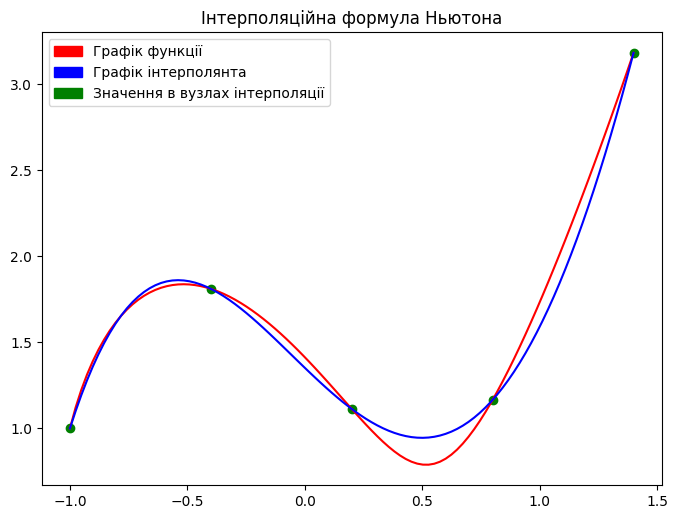

In [295]:
def lg_func(x_i, y_i, f):
    xy_table = pd.concat([
        pd.DataFrame(x_i),
        pd.DataFrame(y_i),
    ], axis=1)
    xy_table.columns = ['$x_i$', '$y_i$',]
    xy_table = xy_table.transpose()
    display(xy_table)
    L_n = lagrange(x_i, y_i)
    show_plot(x_i, y_i, f, L_n, 'Інтерполяційна формула Лагранжа')

def newton_table(x_i, y_i):
    P = [np.copy(y_i)]
    for i in range(1, len(x_i)):
        # vector operations, Det unwrapped
        P.append(
            (P[i-1][1:]-P[i-1][:-1])/(x_i[i:]-x_i[:-i])
        )
    return P
    
def newton_func(x_i, y_i, f):
    table_data = newton_table(x_i, y_i)
    table = pd.concat([
        pd.DataFrame(x_i),
        pd.DataFrame(table_data).transpose(),
    ], axis=1)
    table.columns = [
        '$x_i$',
        '$y_i$',
        *('$\\Delta^'+str(i)+'y$' for i in range(1, len(table)))]
    display(Markdown("#### Таблиця різниць"))
    display(table)
    H = polynomial.Polynomial(table_data[0][0])
    for i in range(1,len(table_data)):
        x_pol = polynomial.Polynomial(1)
        for j in range(i):
            x_pol *= polynomial.Polynomial([-x_i[j], 1])
        H+=table_data[i][0]*x_pol
    
#     H_poly1d = np.poly1d(list(H)[::-1])
    polynom_coef = list(zip(list(range(len(list(H)[::-1])-1,-1,-1)), list(H)[::-1]))
    latex_polynom = reduce(
        lambda prev, p_c: prev+str(p_c[1])+'x^'+str(p_c[0]) if p_c[1] < 0 else prev+'+'+str(p_c[1])+'x^'+str(p_c[0]), ['']+polynom_coef
    )
    latex_polynom = "$" + latex_polynom[:-3] + "$"
    display(Markdown("Інтерполяційний многочлен Ньютона має вигляд "+latex_polynom))
    show_plot(x_i, y_i, f, H, 'Інтерполяційна формула Ньютона')
    
# задання початкових даних
f = lambda x: np.sqrt(5*x**3-4*x+2)
start = -1
stop = 2
step = 0.6
x_i = np.arange(start, stop, step)
# рахуємо значення в точках x_i
y_i = f(x_i)

# Запуск за Лагранжем
lg_func(x_i, y_i, f)
# Запуск за Ньютоном
newton_func(x_i, y_i, f)